In [98]:
import copy
import math
import pandas as pd
import numpy as np
import scipy.stats as ss
from collections import Counter

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [99]:
mushroom_data = pd.read_csv('MushroomDataset/secondary_data.csv', delimiter = ';')

In [100]:
mushroom_data.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [101]:
mushroom_data.describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [102]:
print("Number of Columns: ", mushroom_data.shape[0])
print("Number of Rows: ", mushroom_data.shape[1])

Number of Columns:  61069
Number of Rows:  21


In [103]:
print("\nNull Values")
print(mushroom_data.isna().any())


Null Values
class                   False
cap-diameter            False
cap-shape               False
cap-surface              True
cap-color               False
does-bruise-or-bleed    False
gill-attachment          True
gill-spacing             True
gill-color              False
stem-height             False
stem-width              False
stem-root                True
stem-surface             True
stem-color              False
veil-type                True
veil-color               True
has-ring                False
ring-type                True
spore-print-color        True
habitat                 False
season                  False
dtype: bool


In [104]:
for column, dtype in dict(mushroom_data_dd_nao.dtypes).items():
    if dtype == 'object':
        mushroom_data_dd_nao[column] = pd.Categorical(mushroom_data_dd_nao[column])

In [105]:
for column in mushroom_data.columns:
    if mushroom_data[column].dtypes == 'object':
        uniq = mushroom_data[column].unique()
        print('{}: {} distinct values -  {}\n'.format(column, len(uniq), uniq))

class: 2 distinct values -  ['p' 'e']

cap-shape: 7 distinct values -  ['x' 'f' 'p' 'b' 'c' 's' 'o']

cap-surface: 12 distinct values -  ['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']

cap-color: 12 distinct values -  ['o' 'e' 'n' 'g' 'r' 'w' 'y' 'p' 'u' 'b' 'l' 'k']

does-bruise-or-bleed: 2 distinct values -  ['f' 't']

gill-attachment: 8 distinct values -  ['e' nan 'a' 'd' 's' 'x' 'p' 'f']

gill-spacing: 4 distinct values -  [nan 'c' 'd' 'f']

gill-color: 12 distinct values -  ['w' 'n' 'p' 'u' 'b' 'g' 'y' 'r' 'e' 'o' 'k' 'f']

stem-root: 6 distinct values -  ['s' nan 'b' 'r' 'c' 'f']

stem-surface: 9 distinct values -  ['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']

stem-color: 13 distinct values -  ['w' 'y' 'n' 'u' 'b' 'l' 'r' 'p' 'e' 'k' 'g' 'o' 'f']

veil-type: 2 distinct values -  ['u' nan]

veil-color: 7 distinct values -  ['w' 'y' nan 'n' 'e' 'u' 'k']

has-ring: 2 distinct values -  ['t' 'f']

ring-type: 9 distinct values -  ['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']

spore-print-color: 8

# Drop Duplicates

In [107]:
print('Known mushrooms: {}\nUnique mushrooms: {}'.format(len(mushroom_data.index),len(mushroom_data.drop_duplicates().index)))

Known mushrooms: 61069
Unique mushrooms: 60923


In [108]:
mushroom_data_dd = mushroom_data.drop_duplicates()

In [109]:
print('Known mushrooms: {}\nUnique mushrooms: {}'.format(len(mushroom_data_dd.index),len(mushroom_data_dd.drop_duplicates().index)))

Known mushrooms: 60923
Unique mushrooms: 60923


# Missing Values

In [110]:
missing_columns = []
all_column_nan = dict(mushroom_data_dd.isna().any())
for key, value in all_column_nan.items():
    if value:
        missing_columns.append(key)

In [111]:
print("Printing all values for column with missing values")

for column in missing_columns:
    print("\nMissing Values in {0}".format(column))
    print(mushroom_data_dd[column].unique())

Printing all values for column with missing values

Missing Values in cap-surface
['g' 'h' nan 't' 'y' 'e' 's' 'l' 'd' 'w' 'i' 'k']

Missing Values in gill-attachment
['e' nan 'a' 'd' 's' 'x' 'p' 'f']

Missing Values in gill-spacing
[nan 'c' 'd' 'f']

Missing Values in stem-root
['s' nan 'b' 'r' 'c' 'f']

Missing Values in stem-surface
['y' nan 's' 'k' 'i' 'h' 't' 'g' 'f']

Missing Values in veil-type
['u' nan]

Missing Values in veil-color
['w' 'y' nan 'n' 'e' 'u' 'k']

Missing Values in ring-type
['g' 'p' 'e' 'l' 'f' 'm' nan 'r' 'z']

Missing Values in spore-print-color
[nan 'w' 'p' 'k' 'r' 'u' 'n' 'g']


In [112]:
print("Printing value distribution of columns with missing values")

for column in missing_columns:
    print("\nMissing Values in {0}".format(column))
    print(mushroom_data_dd[column].value_counts(dropna=False))
    temp = dict(mushroom_data_dd[column].value_counts(dropna=False))
    total_val = sum(list(temp.values()))
    nan_val = temp[np.nan]
    print('->Percentage of missing value in {0}: {1}%'.format(column, round(100*nan_val/total_val, 2)))

Printing value distribution of columns with missing values

Missing Values in cap-surface
NaN    14120
t       8184
s       7580
y       6341
h       4974
g       4722
d       4432
e       2584
k       2303
i       2225
w       2150
l       1308
Name: cap-surface, dtype: int64
->Percentage of missing value in cap-surface: 23.18%

Missing Values in gill-attachment
a      12697
d      10247
NaN     9855
x       7413
p       6001
e       5648
s       5648
f       3414
Name: gill-attachment, dtype: int64
->Percentage of missing value in gill-attachment: 16.18%

Missing Values in gill-spacing
NaN    25062
c      24682
d       7765
f       3414
Name: gill-spacing, dtype: int64
->Percentage of missing value in gill-spacing: 41.14%

Missing Values in stem-root
NaN    51536
s       3177
b       3177
r       1412
f        915
c        706
Name: stem-root, dtype: int64
->Percentage of missing value in stem-root: 84.59%

Missing Values in stem-surface
NaN    38122
s       6025
y       4940
i      

**Will replace 'nan' values with 'o' which means "Other".**

In [113]:
mushroom_data_dd_nao = mushroom_data_dd.fillna('o')

In [114]:
print("\nNull Values")
print(mushroom_data_dd_nao.isna().any())


Null Values
class                   False
cap-diameter            False
cap-shape               False
cap-surface             False
cap-color               False
does-bruise-or-bleed    False
gill-attachment         False
gill-spacing            False
gill-color              False
stem-height             False
stem-width              False
stem-root               False
stem-surface            False
stem-color              False
veil-type               False
veil-color              False
has-ring                False
ring-type               False
spore-print-color       False
habitat                 False
season                  False
dtype: bool


# EDA

## Class Distrbution

In [115]:
print("All Mushroom classes Present: {0}".format(mushroom_data_dd_nao['class'].unique()))
mushroom_classes = list(mushroom_data_dd_nao['class'].unique())

All Mushroom classes Present: ['p' 'e']


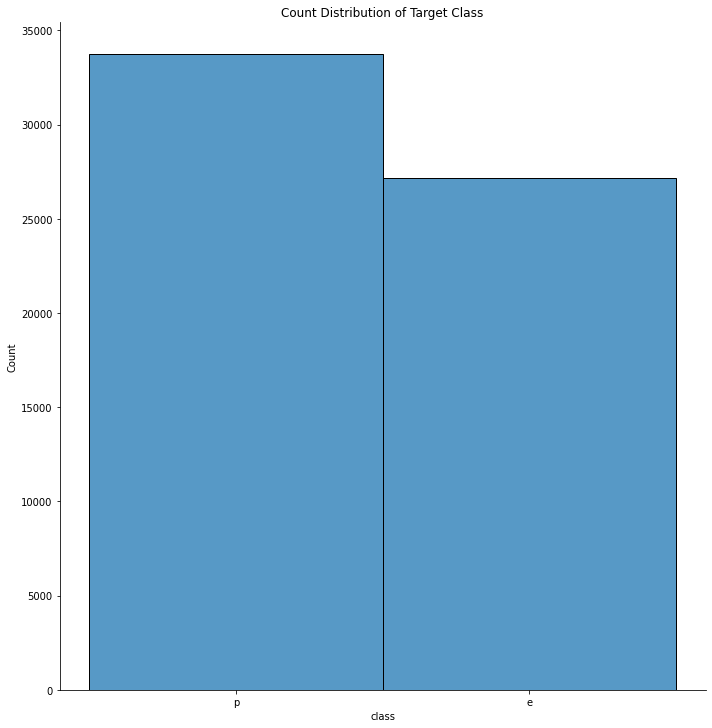

In [116]:
ax = sns.displot(mushroom_data_dd_nao['class'], kde=False, height=10)
plt.xticks([0, 1])
ax.set_xticklabels(mushroom_classes)
plt.title('Count Distribution of Target Class')
plt.show()

## Correlation

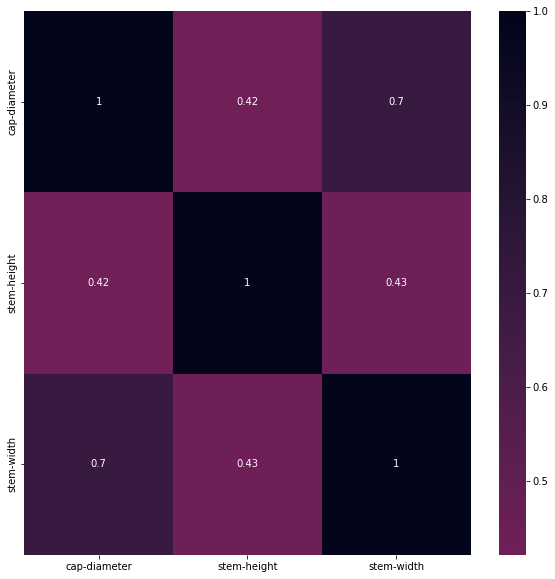

In [117]:
plt.figure(figsize=(10,10))
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(mushroom_data_dd_nao.corr(), annot=True, cmap=cmap, center=0)
plt.show()

In [23]:
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy

def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

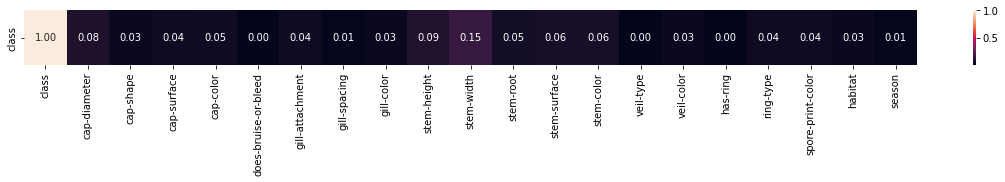

In [24]:
theilu = pd.DataFrame(index=['class'], columns=mushroom_data_dd_nao.columns)

columns = mushroom_data_dd_nao.columns

for j in range(0,len(columns)):
    u = theil_u(mushroom_data_dd_nao['class'].tolist(), mushroom_data_dd_nao[columns[j]].tolist())
    theilu.loc[:, columns[j]] = u

theilu.fillna(value=np.nan, inplace=True)
plt.figure(figsize=(20, 1))
sns.heatmap(theilu ,annot=True, fmt='.2f')
plt.show()

# Encode Categorical

In [25]:
mushroom_data_dd_nao.dtypes

class                   category
cap-diameter             float64
cap-shape               category
cap-surface             category
cap-color               category
does-bruise-or-bleed    category
gill-attachment         category
gill-spacing            category
gill-color              category
stem-height              float64
stem-width               float64
stem-root               category
stem-surface            category
stem-color              category
veil-type               category
veil-color              category
has-ring                category
ring-type               category
spore-print-color       category
habitat                 category
season                  category
dtype: object

In [26]:
categorical_columns = []
for column in mushroom_data_dd_nao.columns:
    if mushroom_data_dd_nao[column].dtypes == 'category':
        categorical_columns.append(column)
        category_dist = dict(enumerate(mushroom_data_dd_nao[column].cat.categories))
        print("The category distrbution for column {0} class attribute {1}\n".format(column, category_dist))
        mushroom_data_dd_nao[column + '_cat'] = mushroom_data_dd_nao[column].cat.codes

The category distrbution for column class class attribute {0: 'e', 1: 'p'}

The category distrbution for column cap-shape class attribute {0: 'b', 1: 'c', 2: 'f', 3: 'o', 4: 'p', 5: 's', 6: 'x'}

The category distrbution for column cap-surface class attribute {0: 'd', 1: 'e', 2: 'g', 3: 'h', 4: 'i', 5: 'k', 6: 'l', 7: 'o', 8: 's', 9: 't', 10: 'w', 11: 'y'}

The category distrbution for column cap-color class attribute {0: 'b', 1: 'e', 2: 'g', 3: 'k', 4: 'l', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 11: 'y'}

The category distrbution for column does-bruise-or-bleed class attribute {0: 'f', 1: 't'}

The category distrbution for column gill-attachment class attribute {0: 'a', 1: 'd', 2: 'e', 3: 'f', 4: 'o', 5: 'p', 6: 's', 7: 'x'}

The category distrbution for column gill-spacing class attribute {0: 'c', 1: 'd', 2: 'f', 3: 'o'}

The category distrbution for column gill-color class attribute {0: 'b', 1: 'e', 2: 'f', 3: 'g', 4: 'k', 5: 'n', 6: 'o', 7: 'p', 8: 'r', 9: 'u', 10: 'w', 1

In [27]:
mushroom_data_dd_nao.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root_cat,stem-surface_cat,stem-color_cat,veil-type_cat,veil-color_cat,has-ring_cat,ring-type_cat,spore-print-color_cat,habitat_cat,season_cat
0,p,15.26,x,g,o,f,e,o,w,16.95,...,5,8,11,1,5,1,2,3,0,3
1,p,16.60,x,g,o,f,e,o,w,17.99,...,5,8,11,1,5,1,2,3,0,2
2,p,14.07,x,g,o,f,e,o,w,17.80,...,5,8,11,1,5,1,2,3,0,3
3,p,14.17,f,h,e,f,e,o,w,15.77,...,5,8,11,1,5,1,6,3,0,3
4,p,14.64,x,h,o,f,e,o,w,16.53,...,5,8,11,1,5,1,6,3,0,3


# Transformation and Splitting

In [28]:
removed_column = copy.deepcopy(categorical_columns)
removed_column.append('class_cat')

In [29]:
X, y = mushroom_data_dd_nao.drop(removed_column, axis=1), mushroom_data_dd_nao['class_cat']

In [30]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [31]:
print("First row of the standardized dataset")
print(X_scaled[0])

First row of the standardized dataset
[ 1.61682025  3.08235556  0.48966898  0.91376808 -1.28206853 -0.04758726
 -0.45869243 -0.43749866  1.11252174  0.83387532  2.37439283  1.97984019
  0.79691842  4.26336333  2.65604017  1.73689747  0.16651043 -0.01435596
 -0.49345491  1.77031588]


In [32]:
feature_names = list(X.columns)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [34]:
print('-Dataset Size-')
print('Training dataset Set:', len(X_train))
print('Test dataset Set:', len(X_test))

-Dataset Size-
Training dataset Set: 42646
Test dataset Set: 18277


# Modeling

## XGBoost

### Training

In [88]:
xgb_params = {}
xgb_params['learning_rate'] = 0.05
xgb_params['objective'] ='binary:logistic'
xgb_params['n_estimators'] = 800
xgb_params['eval_metric'] = 'error'

In [89]:
xgbm = XGBClassifier()
xgbm.set_params(**xgb_params)
xgbm.fit(X_train, y_train)
xgbm.get_booster().feature_names = feature_names

In [90]:
xgbm_y_train_pred = xgbm.predict(X_train)

In [91]:
xgbm_train_acc = metrics.accuracy_score(y_train, xgbm_y_train_pred)
xgbm_train_pre = metrics.precision_score(y_train, xgbm_y_train_pred, average='weighted')
xgbm_train_rec = metrics.recall_score(y_train, xgbm_y_train_pred, average='weighted')

In [92]:
print('XGBoost Accuracy on train dataset:', xgbm_train_acc)
print('XGBoost Precision on train dataset:', xgbm_train_pre)
print('XGBoost Recall on train dataset:', xgbm_train_rec)

XGBoost Accuracy on train dataset: 1.0
XGBoost Precision on train dataset: 1.0
XGBoost Recall on train dataset: 1.0


### Testing

In [93]:
xgbm_y_test_preds = xgbm.predict(X_test)

In [94]:
xgbm_test_acc = metrics.accuracy_score(y_test, xgbm_y_test_preds)
xgbm_test_pre = metrics.precision_score(y_test, xgbm_y_test_preds, average='weighted')
xgbm_test_rec = metrics.recall_score(y_test, xgbm_y_test_preds, average='weighted')
xgbm_test_cnf_matrix = metrics.confusion_matrix(y_test, xgbm_y_test_preds)

In [95]:
print('XGBoost Accuracy on test dataset:', xgbm_test_acc)
print('XGBoost Precision on test dataset:', xgbm_test_pre)
print('XGBoost Recall on test dataset:', xgbm_test_rec)

XGBoost Accuracy on test dataset: 0.9999452864255621
XGBoost Precision on test dataset: 0.9999452931347682
XGBoost Recall on test dataset: 0.9999452864255621


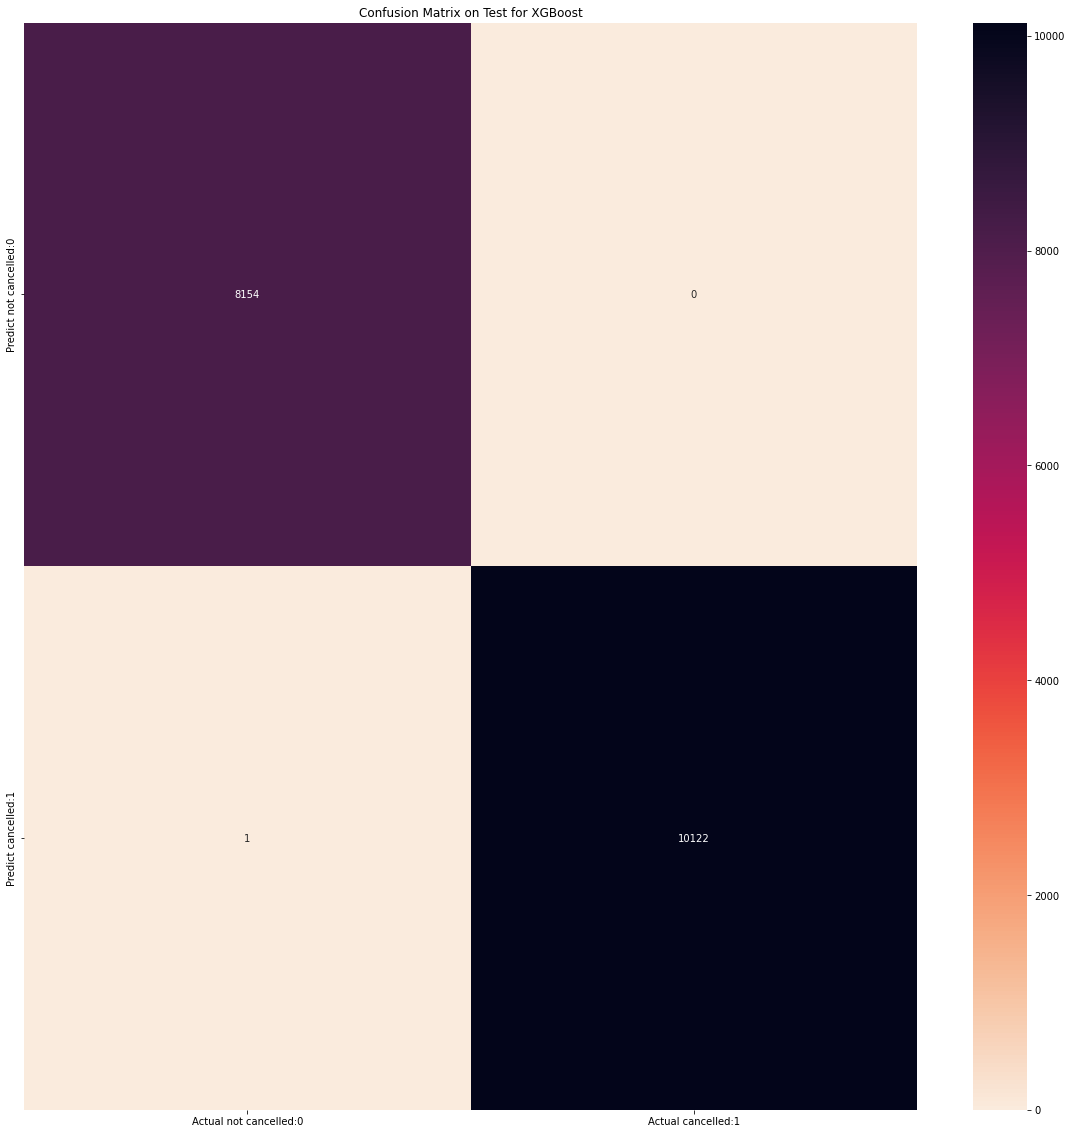

In [96]:
plt.figure(figsize=(20, 20))
plt.title("Confusion Matrix on Test for XGBoost")
cm_matrix = pd.DataFrame(data=xgbm_test_cnf_matrix, columns=['Actual not cancelled:0', 'Actual cancelled:1'], index=['Predict not cancelled:0', 'Predict cancelled:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')
plt.show()

### Feature Importance

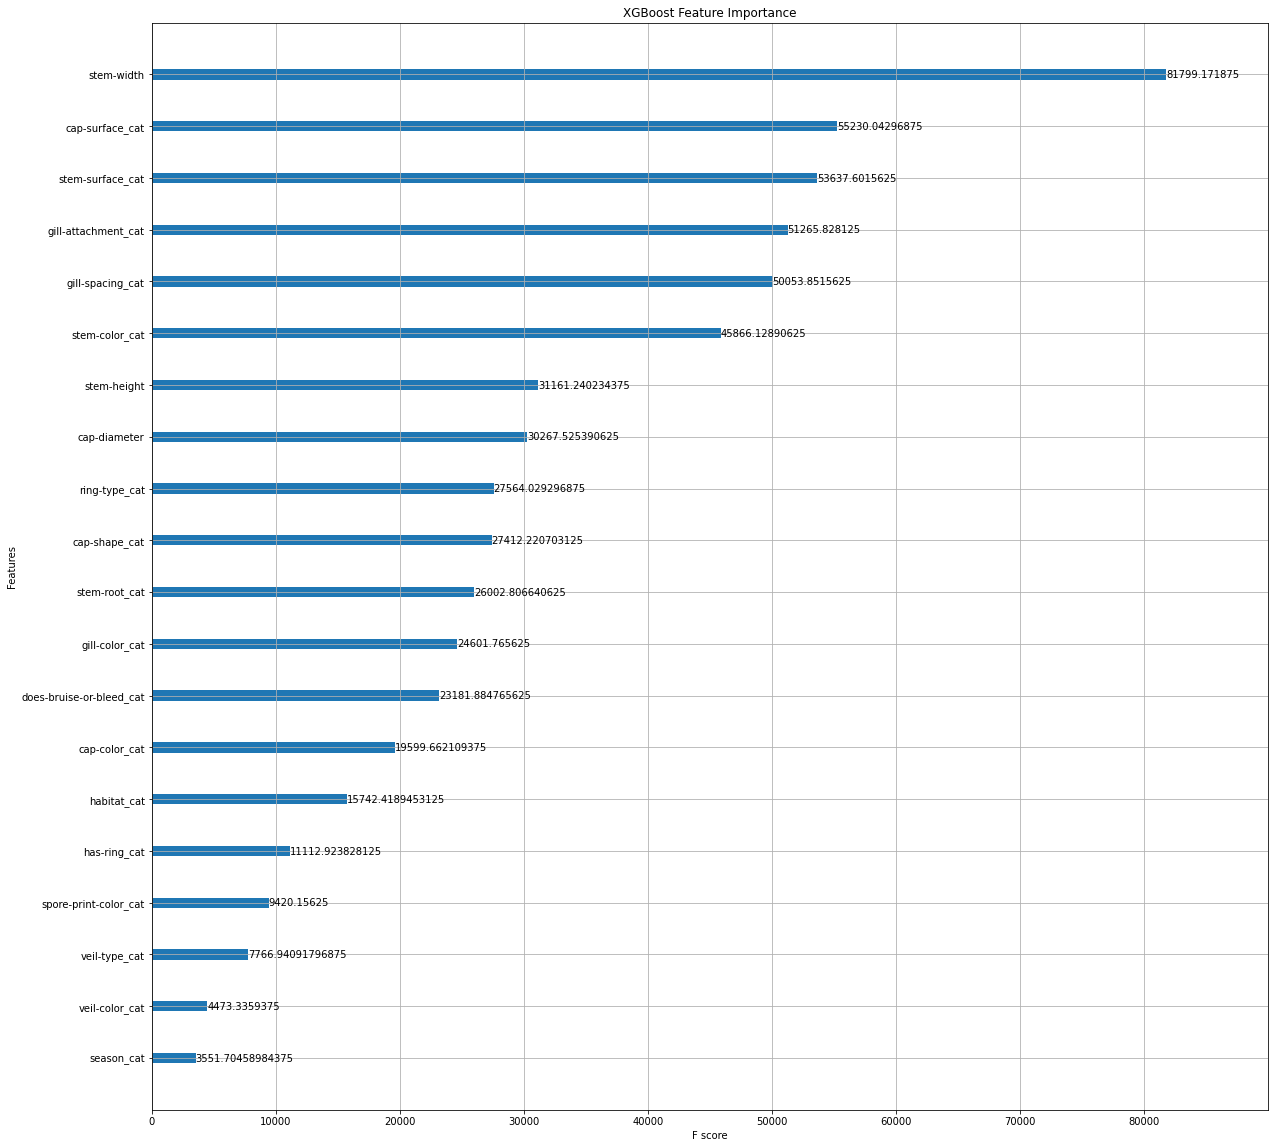

In [97]:
plt.rcParams["figure.figsize"] = (20, 20)
plot_importance(xgbm, importance_type='total_gain', title="XGBoost Feature Importance")
plt.show()

## Random Forest

### Training

In [45]:
rfcm = RandomForestClassifier(criterion = 'gini', n_estimators = 100, random_state=42)

In [46]:
rfcm.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [47]:
rfcm_y_train_pred = rfcm.predict(X_train)

In [48]:
rfcm_train_acc = metrics.accuracy_score(y_train, rfcm_y_train_pred)
rfcm_train_pre = metrics.precision_score(y_train, rfcm_y_train_pred, average='weighted')
rfcm_train_rec = metrics.recall_score(y_train, rfcm_y_train_pred, average='weighted')

In [49]:
print('Random Forest Accuracy on train dataset:', rfcm_train_acc)
print('Random Forest Precision on train dataset:', rfcm_train_pre)
print('Random Forest Recall on train dataset:', rfcm_train_rec)

Random Forest Accuracy on train dataset: 1.0
Random Forest Precision on train dataset: 1.0
Random Forest Recall on train dataset: 1.0


### Testing

In [50]:
rfcm_y_test_preds = rfcm.predict(X_test)

In [51]:
rfcm_test_acc = metrics.accuracy_score(y_test, rfcm_y_test_preds)
rfcm_test_pre = metrics.precision_score(y_test, rfcm_y_test_preds)
rfcm_test_rec = metrics.recall_score(y_test, rfcm_y_test_preds)
rfcm_test_cnf_matrix = metrics.confusion_matrix(y_test, rfcm_y_test_preds)

In [52]:
print('Random Forest Model Accuracy on test dataset:', rfcm_test_acc)
print('Random Forest Model Precision on test dataset:', rfcm_test_pre)
print('Random Forest Model Recall on test dataset:', rfcm_test_rec)

Random Forest Model Accuracy on test dataset: 1.0
Random Forest Model Precision on test dataset: 1.0
Random Forest Model Recall on test dataset: 1.0


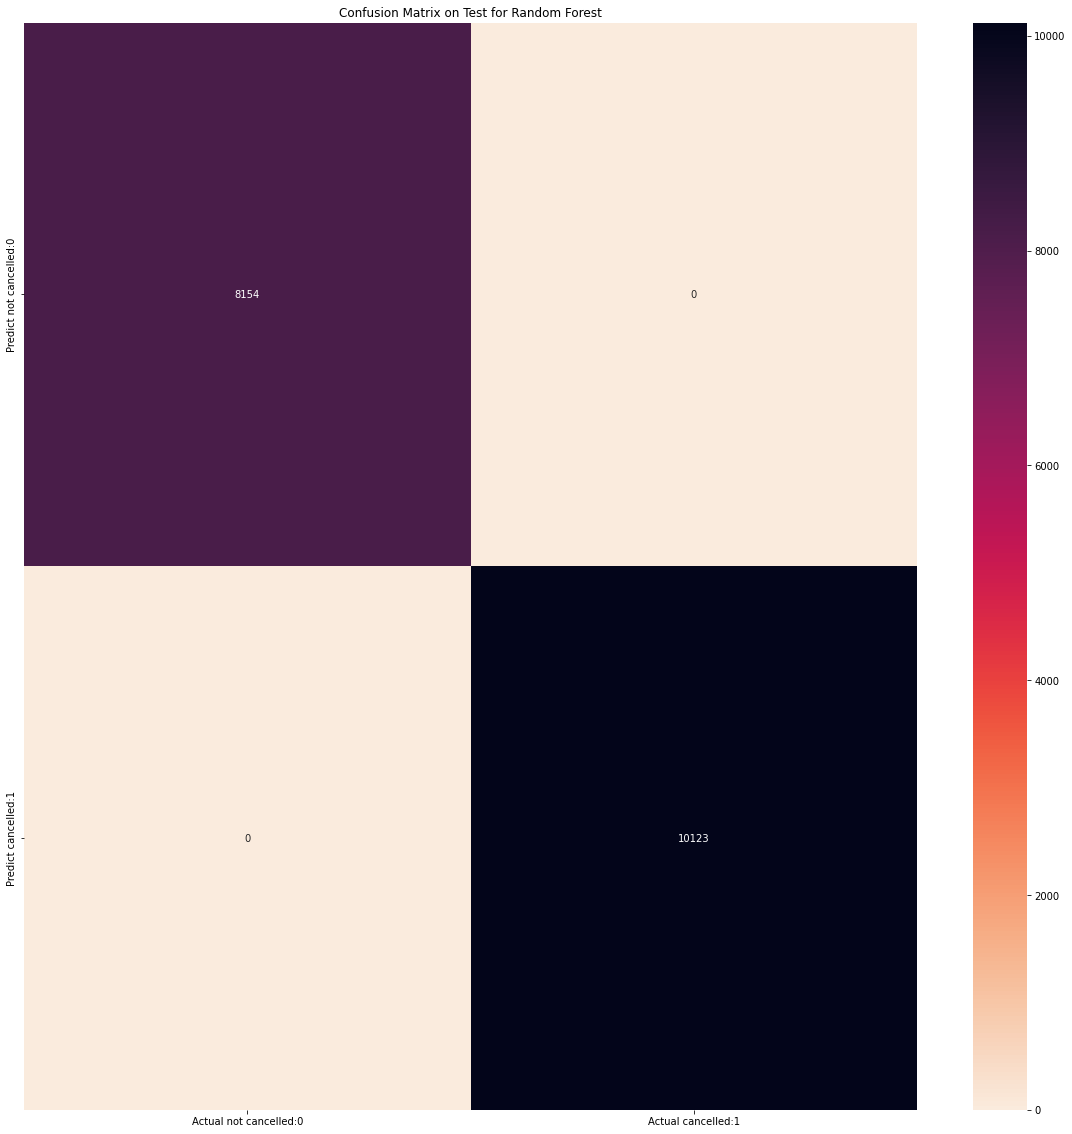

In [53]:
plt.figure(figsize=(20, 20))
plt.title("Confusion Matrix on Test for Random Forest")
cm_matrix = pd.DataFrame(data=rfcm_test_cnf_matrix, columns=['Actual not cancelled:0', 'Actual cancelled:1'], index=['Predict not cancelled:0', 'Predict cancelled:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='rocket_r')
plt.show()

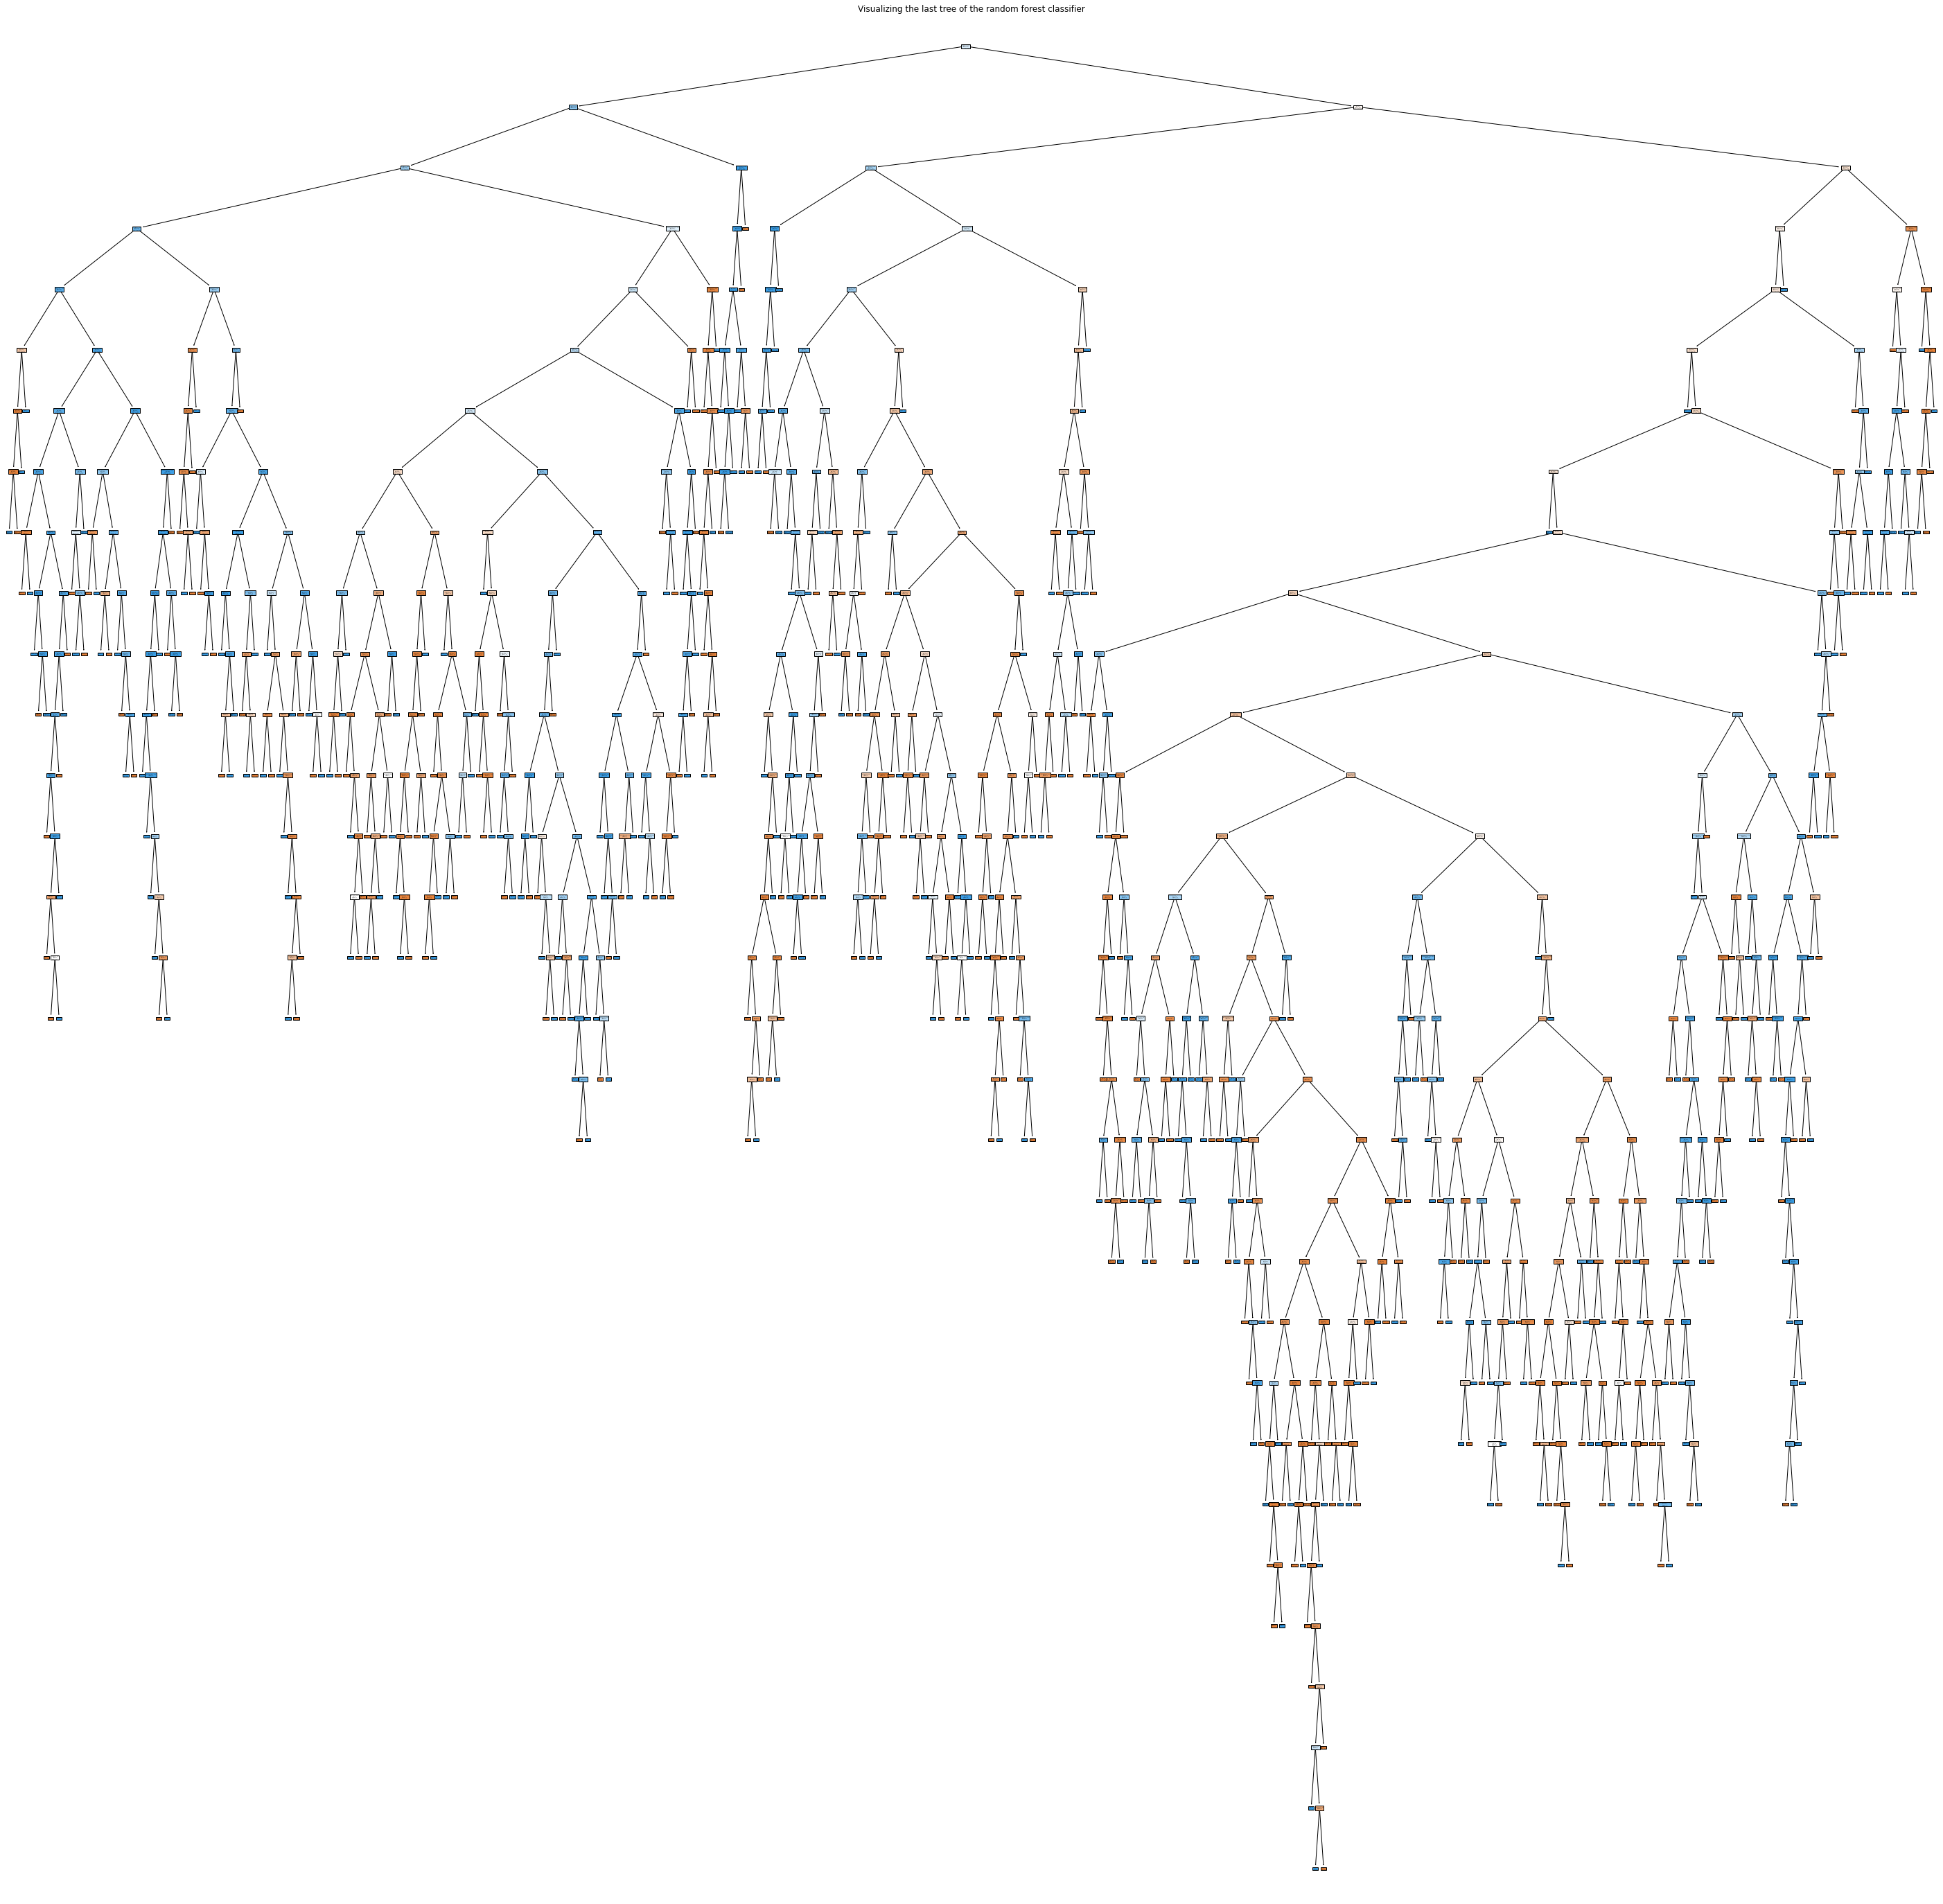

In [54]:
fig = plt.figure(figsize=(50, 50))
plot_tree(rfcm.estimators_[-1], feature_names=feature_names, filled=True)
plt.title("Visualizing the last tree of the random forest classifier")
plt.show()

### Feature Importance

<AxesSubplot: title={'center': 'Random Forest Feature Importance'}>

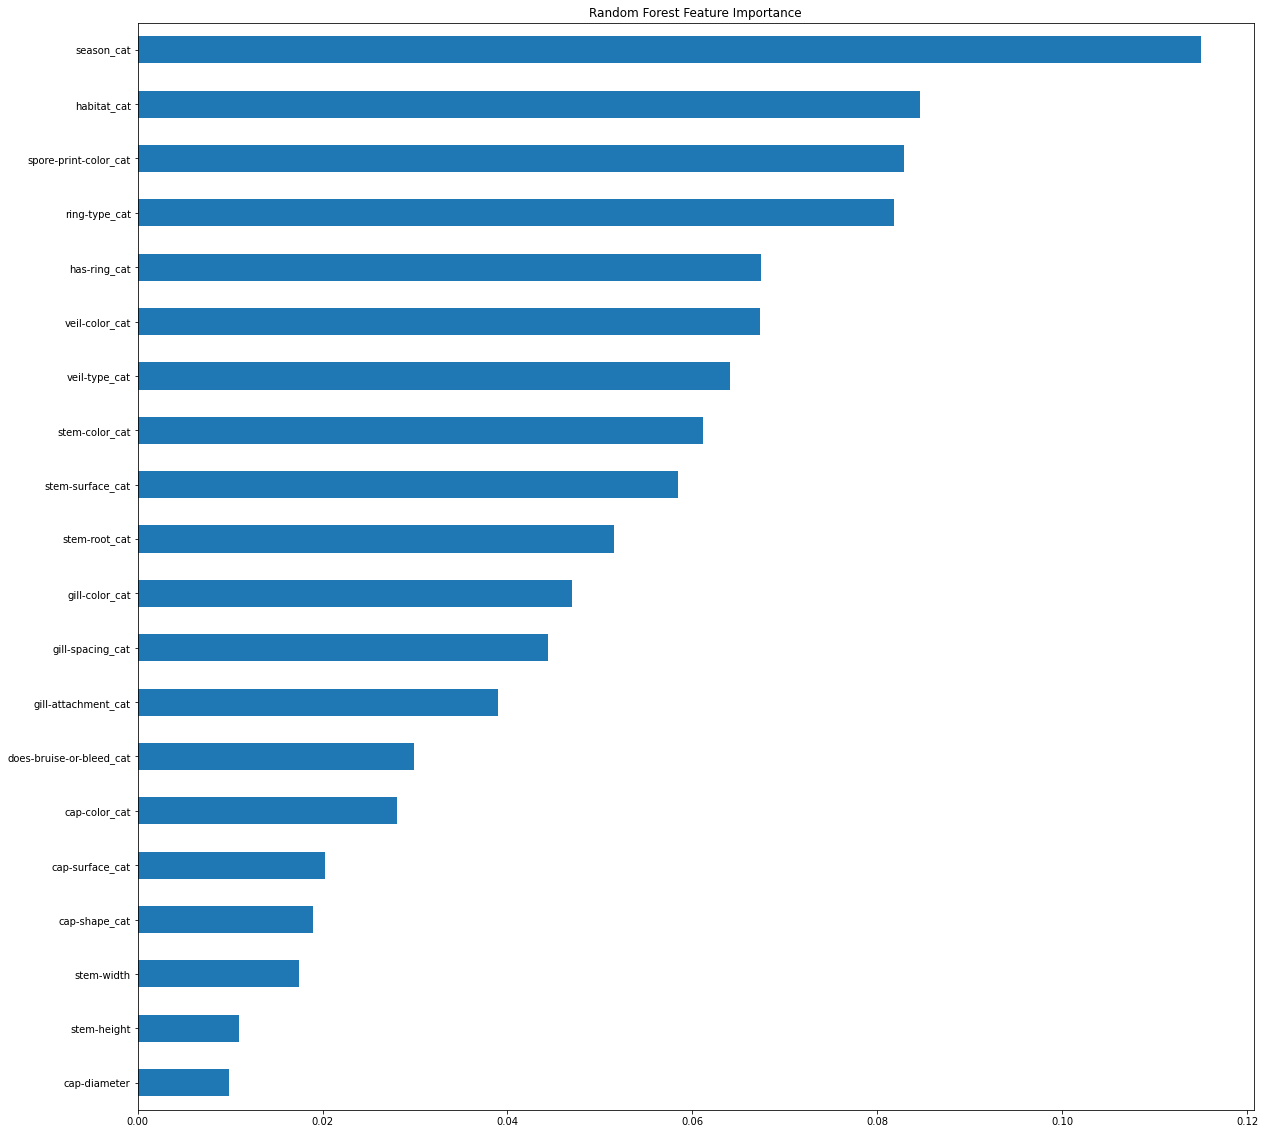

In [55]:
feat_importances = pd.Series(sorted(rfcm.feature_importances_), index=feature_names)
plt.title("Random Forest Feature Importance")
feat_importances.plot(kind='barh')